# Problem Setting: Reversi.

<a name="h1_1"></a>

This notebook demonstrates a Multi-agent Q-Learning to solve Reversi. Reversi is a board game for two players, played on an $8 \times 8$ uncheckered board. First of all, the board must be generated. Here let's express it using `numpy.ndarray`.

In [1]:
import numpy as np
map_arr = np.zeros((8, 8)).astype(int)
map_arr[3, 3] = 1
map_arr[4, 4] = 1
map_arr[3, 4] = -1
map_arr[4, 3] = -1
map_arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -1,  0,  0,  0],
       [ 0,  0,  0, -1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]])

Even if you use `matplotlib` and `seaborn`, you can draw images similar to Reversi's board as it is.

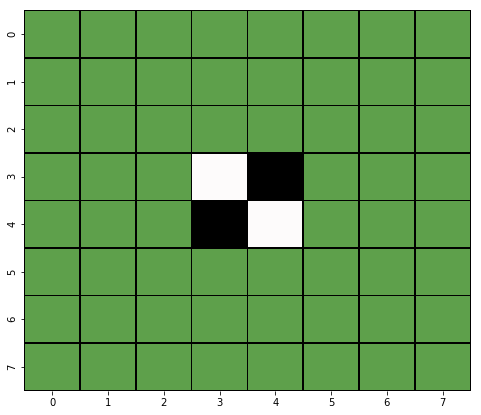

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
fig = plt.figure(figsize=(8, 7))
sns.heatmap(
    map_arr, 
    linewidths=.5, 
    cmap="gist_earth", 
    cbar=False, 
    linecolor="black"
)


In this matrix, `+1` means white and `-1` means black.

## Problem solution: Multi-agent epsilon greedy Q-Learning.

I implemented `ReversiGreedyQLearning` which is-a `GreedyQLearning` by a rush. In this object, an agent observes the board as own state. The agent's action can be selected by this state.

`ReversiGreedyQLearning` has a `evaluate_map_list`. This value means a score matrix when placing a stone at each coordinate. When agents observe reward, Q-Learning algorithm evaluates reward points by this matrix. The reward function is as following:

$$r^{(t)} = \frac{\sum_{x=0}^{7}\sum_{y=0}^{7} M^{t}_{(x, y)}}{\sum_{x=0}^{7}\sum_{y=0}^{7} M^{(t-1)}_{(x, y)}} (t = 1, 2, 3, ..., T)$$

where $t$ is a Monte Carlo step or time step. $M^{t}_{(x, y)}$ is a score in $x$ and $y$ coordinates at time $t$. So $r^{(t)}$ is a change rate of the score.

Although Reversi is two players game, a behavior of `ReversiGreedyQLearning` can be corresponded to one agent. Then you have to instantiate two objects of `ReversiGreedyQLearning`.

In [4]:
from devsample.reversi_greedy_q_learning import ReversiGreedyQLearning

white_player = ReversiGreedyQLearning(color=1)
black_player = ReversiGreedyQLearning(color=-1)

white_player.epsilon_greedy_rate = 0.7
black_player.epsilon_greedy_rate = 0.7

And then, I implemented `AlternatedMultiAgent` which is-a `MultiAgentQLearning` by a rush. `MultiAgentQLearning` is a template method to implement a controller for the Multi-Agent Q-Learning. `AlternatedMultiAgent` is a concrete class for an alternating learning, which can be described that each agent searchs optimal policy observing the enemy player's action. In other words, each agent's state can be transitioned to next state that corresponding to enemy player's action.

In [ ]:
from pyqlearning.multiagentqlearning.alternated_multi_agent import AlternatedMultiAgent

multi_agent_q_learning = AlternatedMultiAgent(
    q_learning_list=[white_player, black_player]
)

multi_agent_q_learning.learn(first_state_key=map_arr, limit=80, game_n=300)

/usr/local/bin/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pandas/core/algorithms.py:410: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  f = lambda x, y: htable.ismember_object(x, values)


Let's visible the result of Multi-Agent learning.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

for i in range(80):
    fig = plt.figure(figsize=(8, 7))
    sns.heatmap(
        multi_agent_q_learning.state_key_list[i], 
        linewidths=.5, 
        cmap="gist_earth", 
        cbar=False, 
        linecolor="black"
    )
    plt.savefig("/tmp/reversi_" + str(i) + ".png");plt.close()


In [ ]:
first_img = Image.open("/tmp/reversi_0.png")
img_list = []
for i in range(1, 80):
    img = Image.open("/tmp/reversi_" + str(i) + ".png")
    img_list.append(img)
    
first_img.save(
    'reversi.gif', 
    save_all=True, 
    append_images=img_list,
    optimized=True, 
    duration=40, 
    loop=0
)

In [ ]:
Image.open("reversi.gif")

In [ ]:
white_player_2 = ReversiGreedyQLearning(color=1)
black_player_2 = ReversiGreedyQLearning(color=-1)

black_player_2.r_df = multi_agent_q_learning.q_learning_list[0].r_df
white_player_2.r_df = multi_agent_q_learning.q_learning_list[1].r_df
black_player_2.q_df = multi_agent_q_learning.q_learning_list[0].q_df
white_player_2.q_df = multi_agent_q_learning.q_learning_list[1].q_df

In [ ]:
multi_agent_q_learning_2 = MultiAgentQLearning(
    q_learning_list=[white_player_2, black_player_2]
)
multi_agent_q_learning_2.state_key_list = []
multi_agent_q_learning_2.learn(first_state_key=map_arr, limit=40, game_n=5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

for i in range(80):
    fig = plt.figure(figsize=(8, 7))
    sns.heatmap(
        multi_agent_q_learning_2.state_key_list[i], 
        linewidths=.5, 
        cmap="gist_earth", 
        cbar=False, 
        linecolor="black"
    )
    plt.savefig("/tmp/reversi_t_" + str(i) + ".png");plt.close()

first_img = Image.open("/tmp/reversi_t_0.png")
img_list = []
for i in range(1, 100):
    img = Image.open("/tmp/reversi_t_" + str(i) + ".png")
    img_list.append(img)
    
first_img.save(
    'reversi_t.gif', 
    save_all=True, 
    append_images=img_list,
    optimized=True, 
    duration=40, 
    loop=0
)
Image.open("reversi_t.gif")